In [ ]:
import numpy as np

先添加一个帮助函数用于打印数据的详细信息。

In [89]:
def print_detail(data):
    print("shape: ", data.shape)
    print("dtype: ", data.dtype)
    print("max: %d, min: %d" % (data.max(), data.min()))
    print("sum: %d" % data.sum())
    print("channel 0:")
    print(data[:,:,0])
    print("channel 1:")
    print(data[:,:,1])
    
result = {}

读取同一张图片 `test.jpg`, 尺寸为 500 x 311

## 使用matplotlib

In [91]:
import matplotlib.pyplot as plt
img = plt.imread("./test.jpg")
print_detail(img)

shape:  (311, 500, 3)
dtype:  uint8
max: 255, min: 0
sum: 41362093
channel 0:
[[ 80  80  81 ..., 175 174 173]
 [ 80  81  81 ..., 176 175 174]
 [ 81  82  83 ..., 177 176 175]
 ..., 
 [ 67  67  69 ...,  46  46  46]
 [ 70  70  72 ...,  46  46  46]
 [ 69  70  72 ...,  46  46  46]]
channel 1:
[[55 55 56 ..., 85 84 83]
 [55 56 56 ..., 86 85 84]
 [56 57 57 ..., 87 86 85]
 ..., 
 [55 55 57 ..., 46 46 46]
 [58 58 60 ..., 46 46 46]
 [57 58 60 ..., 46 46 46]]


shape对应的是(高度, 宽度, 通道数), 通道按RGB排序。

## 使用Pillow

In [92]:
from PIL import Image
pil_img = Image.open("./test.jpg")
pil_img = np.array(pil_img.getdata()).reshape(pil_img.size[1], pil_img.size[0], 3)
print_detail(pil_img)

shape:  (311, 500, 3)
dtype:  int32
max: 255, min: 0
sum: 41362093
channel 0:
[[ 80  80  81 ..., 175 174 173]
 [ 80  81  81 ..., 176 175 174]
 [ 81  82  83 ..., 177 176 175]
 ..., 
 [ 67  67  69 ...,  46  46  46]
 [ 70  70  72 ...,  46  46  46]
 [ 69  70  72 ...,  46  46  46]]
channel 1:
[[55 55 56 ..., 85 84 83]
 [55 56 56 ..., 86 85 84]
 [56 57 57 ..., 87 86 85]
 ..., 
 [55 55 57 ..., 46 46 46]
 [58 58 60 ..., 46 46 46]
 [57 58 60 ..., 46 46 46]]


In [96]:
np.array(Image.open("./test.jpg").getdata()).shape

(155500, 3)

### 备注
通过PIL获取numpy数据需要经过一层转换，并且数据类型默认是int32的, 可以调用`pil_img.astype(np.uint8)`转换成uint8类型。得到的数据同使用matplotlib读取的一模一样。

## 使用scikit-image

In [26]:
import skimage.io

In [100]:
skimg = skimage.io.imread("./test.jpg")
print_detail(skimg)

shape:  (311, 500, 3)
dtype:  uint8
max: 255, min: 0
sum: 41362093
channel 0:
[[ 80  80  81 ..., 175 174 173]
 [ 80  81  81 ..., 176 175 174]
 [ 81  82  83 ..., 177 176 175]
 ..., 
 [ 67  67  69 ...,  46  46  46]
 [ 70  70  72 ...,  46  46  46]
 [ 69  70  72 ...,  46  46  46]]
channel 1:
[[55 55 56 ..., 85 84 83]
 [55 56 56 ..., 86 85 84]
 [56 57 57 ..., 87 86 85]
 ..., 
 [55 55 57 ..., 46 46 46]
 [58 58 60 ..., 46 46 46]
 [57 58 60 ..., 46 46 46]]


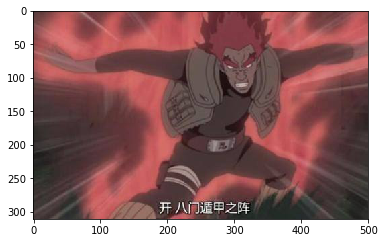

In [101]:
plt.imshow(skimg)
plt.show()

这个读取也非常标准，跟matplotlib得到的一样。

## 使用TensorFlow

shape:  (311, 500, 3)
dtype:  uint8
max: 255, min: 0
sum: 41135229
channel 0:
[[ 79  79  80 ..., 175 174 173]
 [ 80  80  81 ..., 175 174 173]
 [ 81  81  83 ..., 177 176 175]
 ..., 
 [ 66  67  68 ...,  45  45  45]
 [ 69  70  71 ...,  45  45  45]
 [ 69  70  71 ...,  45  45  45]]
channel 1:
[[54 54 55 ..., 85 84 83]
 [55 55 56 ..., 85 84 83]
 [56 56 57 ..., 87 86 85]
 ..., 
 [54 55 56 ..., 45 45 45]
 [57 58 59 ..., 45 45 45]
 [57 58 59 ..., 45 45 45]]


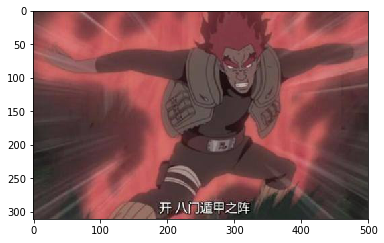

In [102]:
import tensorflow as tf
path_queue = tf.train.string_input_producer(["./test.jpg"])
reader = tf.WholeFileReader()
path, content = reader.read(path_queue)
image_raw = tf.image.decode_jpeg(content)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator() #协同启动的线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord) #启动线程运行队列
    tf_image = sess.run(image_raw)
    print_detail(tf_image)
    coord.request_stop() #停止所有的线程
    coord.join(threads)
    plt.imshow(image)
    plt.show()
#image

得到的数据布局和类型与matplotlib一致，但是像素会上上略有差别，像素值相差范围在2以内。

In [83]:
from collections import Counter
Counter((tf_image - skimg).ravel().tolist()).most_common(10)

[(0, 239484), (255, 226664), (254, 184), (1, 168)]

## 使用OpenCV

In [103]:
import cv2
a = cv2.imread("./test.jpg")[...,::-1]
print_detail(a)

shape:  (311, 500, 3)
dtype:  uint8
max: 255, min: 0
sum: 41362093
channel 0:
[[ 80  80  81 ..., 175 174 173]
 [ 80  81  81 ..., 176 175 174]
 [ 81  82  83 ..., 177 176 175]
 ..., 
 [ 67  67  69 ...,  46  46  46]
 [ 70  70  72 ...,  46  46  46]
 [ 69  70  72 ...,  46  46  46]]
channel 1:
[[55 55 56 ..., 85 84 83]
 [55 56 56 ..., 86 85 84]
 [56 57 57 ..., 87 86 85]
 ..., 
 [55 55 57 ..., 46 46 46]
 [58 58 60 ..., 46 46 46]
 [57 58 60 ..., 46 46 46]]


由上可知， OpenCV的结果与matplotlib一致。

In [107]:
Image.open("image_reading.png").show()